## Notebook to better optimize truth analysis methodology

In [66]:
import numpy as np
import pandas as pd
import ROOT
import array
import root_pandas as rp
import matplotlib.pyplot as plt
import torch #maybe we'll use some pytorch?
import matplotlib
from numba import jit
from matplotlib import animation, rc
matplotlib.rcParams['text.usetex'] = False
plt.rc('legend', fontsize=15)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=20)
plt.rc('axes', titlesize=20)

#### Load data

In [2]:
Bs = rp.read_root('/home/jeff/data/thesis_data/truth_B_and_lepton_ntuples/958730_truth_events.root', key = 'truthB')
leptons = rp.read_root('/home/jeff/data/thesis_data/truth_B_and_lepton_ntuples/958730_truth_events.root', key = 'truth_lepton')

#### Exploratory analysis

In [3]:
tmp = Bs.groupby('__event__').diff()
sums = Bs.groupby('__event__').sum()
tmp.dropna(subset = ['mcPDG'], inplace = True)
tmp.index = [i for i in range(0,len(tmp))]
tmp['mcDecayVertexFromIPZ'] = np.abs(tmp['mcDecayVertexFromIPZ'].to_numpy())
tmp['mcDeltaT'] = tmp['mcDecayVertexFromIPZ']/(0.425*3e10)*1e12
sums.index = [i for i in range(0,len(sums))]
sums['mcDecayVertexFromIPZ'] = np.abs(sums['mcDecayVertexFromIPZ'].to_numpy())
sums['mcSumT'] = sums['mcDecayVertexFromIPZ']/(0.425*3e10)*1e12
tmp['mcSumT'] = sums['mcSumT']

In [4]:
tmp['SF']=0
tmp['OF']=0
index1 = tmp.loc[tmp['mcPDG']!=0].index.to_numpy()
index2 = tmp.loc[tmp['mcPDG']==0].index.to_numpy()
tmp['SF'][index2]=1
tmp['OF'][index1]=1

/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [36]:
test2 = tmp.groupby(pd.cut(tmp['mcDeltaT'],bins = np.linspace(0,15,16))).sum()
test2_err = np.sqrt(tmp.groupby(pd.cut(tmp['mcDeltaT'],bins = np.linspace(0,15,16))).sum())

/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [37]:
A2 = (test2['OF']-test2['SF'])/(test2['OF']+test2['SF'])
A2_err = np.abs(A2)*np.sqrt((np.sqrt(test2_err['OF']**2+test2_err['SF']**2)/(test2['OF']-test2['SF']))**2 + (np.sqrt(test2_err['OF']**2+test2_err['SF']**2)/(test2['OF']+test2['SF']))**2)

In [5]:
test = tmp.groupby(pd.cut(tmp['mcDeltaT'],bins = [0,0.5] + [i for i in range(1,7)] + [7,9,13,20])).sum()
test_err = np.sqrt(tmp.groupby(pd.cut(tmp['mcDeltaT'],bins = [0,0.5] + [i for i in range(1,7)] + [7,9,13,20])).sum())

/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


In [6]:
A = (test['OF']-test['SF'])/(test['OF']+test['SF'])
A_err = np.abs(A)*np.sqrt((np.sqrt(test_err['OF']**2+test_err['SF']**2)/(test['OF']-test['SF']))**2 + (np.sqrt(test_err['OF']**2+test_err['SF']**2)/(test['OF']+test['SF']))**2)

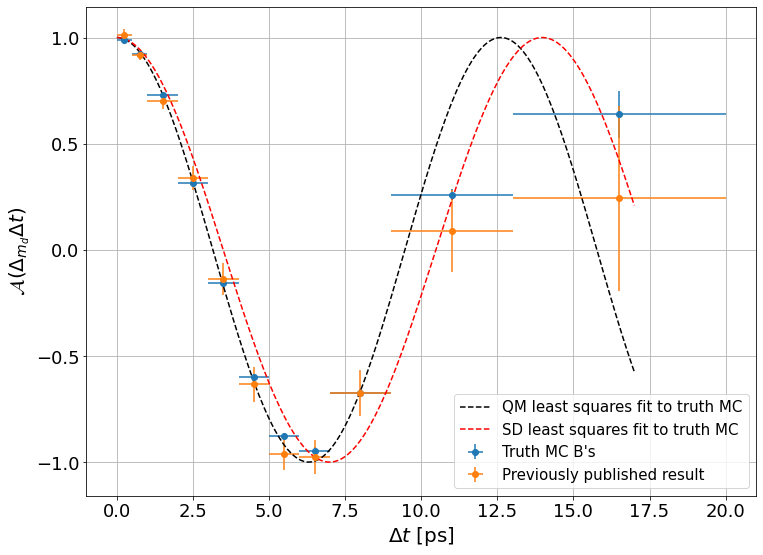

In [72]:
plt.figure(figsize = (12,9))
centers = [0.25,0.75,1.5,2.5,3.5,4.5,5.5,6.5,8,11,16.5]
widths = [0.25, 0.25, 0.5, 0.5 ,0.5, 0.5, 0.5, 0.5, 1, 2, 3.5]
plt.errorbar(centers,A,A_err,widths, 'o', label = "Truth MC B's")

go = np.array([1.013, 0.916, 0.699, 0.339, -0.136, -0.634, -0.961, -0.974, -0.675, 0.089, 0.243])
go_err = np.array([0.028, 0.022, 0.038, 0.056, 0.075, 0.084, 0.077, 0.080, 0.109, 0.193, 0.435])
plt.errorbar(centers,go,go_err,widths, 'o', label = 'Previously published result')

x = np.linspace(0,17,201)
plt.plot(x, np.cos(0.498*x), 'k', linestyle = '--', label='QM least squares fit to truth MC')
plt.plot(x, np.cos(0.4496*x), 'red', linestyle = '--', label='SD least squares fit to truth MC')

plt.ylabel(r'$\mathcal{A}(\Delta_{m_d}\Delta t)$')
plt.xlabel(r'$\Delta t$ [ps]')
plt.grid()
plt.legend()
plt.savefig('truth_mc_result.png', bbox_inches = 'tight', dpi = 300)

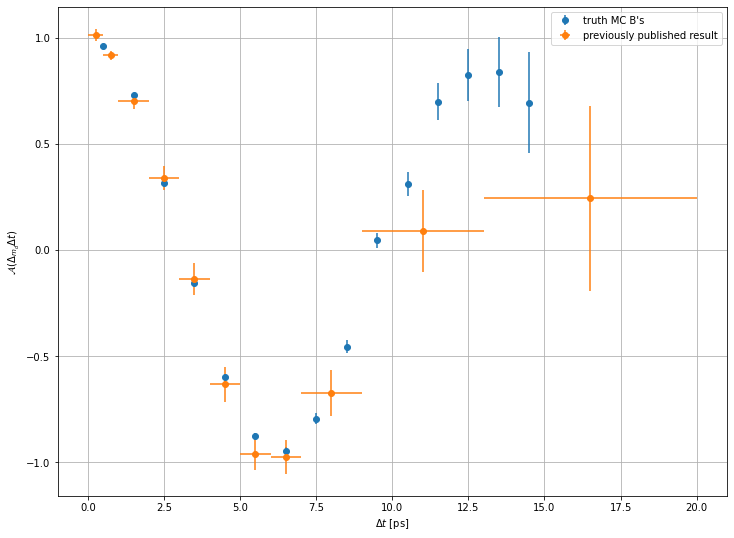

In [39]:
plt.figure(figsize = (12,9))
centers = [0.25,0.75,1.5,2.5,3.5,4.5,5.5,6.5,8,11,16.5]
widths = [0.25, 0.25, 0.5, 0.5 ,0.5, 0.5, 0.5, 0.5, 1, 2, 3.5]
plt.errorbar(np.array([i for i in range(0,15)])+.5,A2,A2_err,None, 'o', label = "truth MC B's")

go = np.array([1.013, 0.916, 0.699, 0.339, -0.136, -0.634, -0.961, -0.974, -0.675, 0.089, 0.243])
go_err = np.array([0.028, 0.022, 0.038, 0.056, 0.075, 0.084, 0.077, 0.080, 0.109, 0.193, 0.435])
plt.errorbar(centers,go,go_err,widths, 'o', label = 'previously published result')

plt.ylabel(r'$\mathcal{A}(\Delta_{m_d}\Delta t)$')
plt.xlabel(r'$\Delta t$ [ps]')
plt.grid()
plt.legend()

In [ ]:
A

In [ ]:
leptons['truth_signal'] = 0
index = leptons.loc[np.abs(leptons['genMotherPDG'])==511].index.to_numpy()
leptons['truth_signal'][index] = 1

In [ ]:
signal = leptons.loc[leptons['truth_signal']==1]
bg = leptons.loc[leptons['truth_signal']==0]
signal.index = [i for i in range(0,len(signal))]
bg.index = [i for i in range(0,len(bg))]
signal = signal.replace([np.inf, -np.inf], -1)
bg = bg.replace([np.inf, -np.inf], -1)
signal = signal.replace(np.nan, -1)
bg = bg.replace(np.nan, -1)

In [ ]:
plt.figure(figsize = (15,60))
i=1
for col in leptons.columns:
    plt.subplot(15,3,i)
    plt.hist(signal[col],histtype='step', label = 'signal',bins = 100)
    plt.hist(bg[col],histtype='step', label = 'bg', bins = 100)
    plt.title(col)
    plt.yscale("Log")
    i+=1

In [ ]:
plt.hist(signal['genMotherP'],histtype='step', label = 'signal',bins = 100)
plt.hist(bg['genMotherP'],histtype='step', label = 'bg', bins = 100)
plt.yscale("log")

In [ ]:
signal_red = signal.loc[(signal['genMotherP']<2.75) & (signal['genMotherP']>1.75)]
bg_red = bg.loc[(bg['genMotherP']<2.75) & (bg['genMotherP']>1.75)]

In [ ]:
plt.hist(signal['mcPT'],histtype='step', label = 'signal',bins = 200)
plt.hist(bg_red['mcPT'],histtype='step', label = 'bg', bins = 200)
plt.yscale("log")
plt.xlim(0.2,0.3)

In [ ]:
signal_red = signal.loc[(signal['genMotherP']<2.75) & (signal['genMotherP']>1.75) & (signal['mcPT']>0.245)]
bg_red = bg.loc[(bg['genMotherP']<2.75) & (bg['genMotherP']>1.75) & (bg['mcPT']>0.245)]

In [ ]:
lred = leptons.loc[(leptons['genMotherP']<2.75) & (leptons['genMotherP']>1.75) & (leptons['mcPT']>0.245)]
lred['index'] = lred.index.to_numpy()

In [ ]:
#Use filler pivot table to only keep entries with two events
pivot_tmp = pd.pivot_table(lred[['__event__','__run__']], index=['__event__'],aggfunc=len)

In [ ]:
pos = pivot_tmp.loc[pivot_tmp['__run__']==2].index.to_numpy()
lred = lred.loc[lred['__event__'].isin(pos)]

In [ ]:
lred.index = [i for i in range(0,len(lred))]

In [ ]:
lred.columns

In [ ]:
lred['mcProductionVertexZ']

In [ ]:
ltmp = lred.groupby('__event__').diff()
ltmp.dropna(subset = ['mcPDG'], inplace = True)
ltmp.index = [i for i in range(0,len(ltmp))]
ltmp['mcProductionVertexFromIPZ'] = np.abs(ltmp['mcProductionVertexFromIPZ'].to_numpy())
ltmp['mcDeltaT'] = ltmp['mcProductionVertexFromIPZ']/(0.425*3e10)*1e12

In [ ]:
ltmp['SF']=0
ltmp['OF']=0
index1 = ltmp.loc[np.abs(ltmp['mcPDG'])>2].index.to_numpy()
index2 = ltmp.loc[np.abs(ltmp['mcPDG'])<=2].index.to_numpy()
ltmp['SF'][index2]=1
ltmp['OF'][index1]=1

In [ ]:
ltest = ltmp.groupby(pd.cut(ltmp['mcDeltaT'],bins = [0,0.5] + [i for i in range(1,7)] + [7,9,13,20])).sum()
ltest_err = np.sqrt(ltmp.groupby(pd.cut(ltmp['mcDeltaT'],bins = [0,0.5] + [i for i in range(1,7)] + [7,9,13,20])).sum())

In [ ]:
A_lep = (ltest['OF']-ltest['SF'])/(ltest['OF']+ltest['SF'])
A_lep_err = np.abs(A)*np.sqrt((np.sqrt(ltest_err['OF']**2+ltest_err['SF']**2)/(ltest['OF']-ltest['SF']))**2 + (np.sqrt(ltest_err['OF']**2+ltest_err['SF']**2)/(ltest['OF']+ltest['SF']))**2)

In [ ]:
plt.rc('legend', fontsize=18)
plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=24)
plt.rc('axes', labelsize=26)
plt.rc('axes', titlesize=26)
plt.figure(figsize = (12,9))
centers = [0.25,0.75,1.5,2.5,3.5,4.5,5.5,6.5,8,11,16.5]
widths = [0.25, 0.25, 0.5, 0.5 ,0.5, 0.5, 0.5, 0.5, 1, 2, 3.5]
plt.errorbar(centers,A,A_err,widths, 'o', label = "truth signal MC B's")

go = np.array([1.013, 0.916, 0.699, 0.339, -0.136, -0.634, -0.961, -0.974, -0.675, 0.089, 0.243])
go_err = np.array([0.028, 0.022, 0.038, 0.056, 0.075, 0.084, 0.077, 0.080, 0.109, 0.193, 0.435])
plt.errorbar(centers,go,go_err,widths, 'o', label = 'previously published result')

plt.errorbar(centers,A_lep,A_lep_err,widths, 'o', label = "truth MC leptons")

dt = np.linspace(0,15,101)
plt.plot(dt,np.cos(0.496*dt))

plt.ylabel(r'$\mathcal{A}(\Delta_{m_d}\Delta t)$')
plt.xlabel(r'$\Delta t$ [ps]')
plt.grid()
plt.legend()

In [ ]:
array.array('d', A_lep)

In [52]:
def root_fit(plot_data, A, A_err): #fits cosine curve to data (asymmetry computed from binning)
    #x1 = array.array('d', [0.25,0.75,1.5,2.5,3.5,4.5,5.5,6.5,8,11,16.5])
    x1 = array.array('d', np.array([i for i in range(0,15)])+0.5)
    #x2 = array.array('d', plot_data['sumT'])
    y = array.array('d', A)
    xerr = array.array('d', [0 for i in range(0,len(x1))])
    #xerr = array.array('d', [0.25, 0.25, 0.5, 0.5 ,0.5, 0.5, 0.5, 0.5, 1, 2, 3.5])
    yerr = array.array('d', A_err)
    gr = ROOT.TGraphErrors(len(x1), x1, y, xerr, yerr)
    f = ROOT.TF1('f1', 'cos([0]*x)', 0, 15)
    #f.SetParLimits(0,0.1,0.9)
    gr.Fit('f1', 'SMRB')
    #f2 = ROOT.TF2("f2","0.5*(cos([0]*x)+cos([0]*y))", 0, 20, 0, 100)
    #f2.SetParLimits(0,0.1,0.9)
    #gr2 = ROOT.TGraph2D(len(x1), x1, x2, y)
    #gr2.Fit('f2', 'S')
    #fitdict = {"QM":f.GetParameter(0), "QM_err":f.GetParError(0), "SD":f2.GetParameter(0), "SD_err":f.GetParError(0)}
    fitdict = {"QM":f.GetParameter(0), "QM_err":f.GetParError(0)}
    return fitdict

In [53]:
root_fit(tmp,A2,A2_err)

{'QM': 0.4966873475607627, 'QM_err': 0.0009415932371312678}

 FCN=58.731 FROM HESSE     STATUS=OK              5 CALLS          41 TOTAL
                     EDM=3.8647e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.96687e-01   9.41593e-04   7.10642e-07   9.33705e-01


In [ ]:
h = ROOT.TH1D("h1","Hist with variable bin width",11,array.array('d', [0,0.5,1,2,3,4,5,6,7,9,13,20]))
for i in range(0,len(A)):
    h.SetBinContent(i+1,A[i])
    h.SetBinError(i+1,A_err[i])
f = ROOT.TF1('f1', 'cos([0]*x)', 0, 20)
h.Fit('f1', 'BRE')
fitdict = {"QM":f.GetParameter(0), "QM_err":f.GetParError(0)}
f.GetChisquare()
f.GetNDF()

In [7]:
def bin_data_and_compute_asymmetry(data, col = 'mcDeltaT'):
        data = data.loc[data[col].duplicated() == False]
        data_reduced = data[['OF', 'SF', col, 'mcSumT']]
        data_reduced['bin_num'] = 0
        #bin according to Go's convention for now
        data_reduced['bin_num'][data_reduced.loc[(data_reduced[col]>=0.5) & (data_reduced[col]< 1)].index.to_numpy()]=1 #Bin_Num according to Go's convention
        for i in range(2, 8):
            data_reduced['bin_num'][data_reduced.loc[(data_reduced[col]>=i-1) & (data_reduced[col]< i)].index.to_numpy()]=i
        data_reduced['bin_num'][data_reduced.loc[(data_reduced[col]>=7) & (data_reduced[col]< 9)].index.to_numpy()]=8
        data_reduced['bin_num'][data_reduced.loc[(data_reduced[col]>=9) & (data_reduced[col]< 13)].index.to_numpy()]=9
        data_reduced['bin_num'][data_reduced.loc[(data_reduced[col]>=13) & (data_reduced[col]< 20)].index.to_numpy()]=10
        data_reduced['asymmetry'] = 0
        asymmetry = []
        for i in range(0,11):
            asymmetry.append((data_reduced.loc[data_reduced['bin_num']==i]['OF'].sum()-data_reduced.loc[data_reduced['bin_num']==i]['SF'].sum())/(data_reduced.loc[data_reduced['bin_num']==i]['OF'].sum()+data_reduced.loc[data_reduced['bin_num']==i]['SF'].sum()))
            index = data_reduced.loc[data_reduced['bin_num'] == i].index.to_numpy()
            data_reduced['asymmetry'][index] = asymmetry[i]
        return data_reduced

In [8]:
a = bin_data_and_compute_asymmetry(tmp)

/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/home/jeff/anaconda3/envs/root_env/lib/python3.6/site-packages/pandas/core/series.py:1061: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [9]:
a = a.sort_values(by = 'bin_num')

In [124]:
@jit(nopython=True)
def get_err_array(a, A, A_err):
    asymmetry_err = []
    for i in range(0,len(a)):
        for j in range(0,len(A)):
            if np.abs(a[i]-A[j]) <0.002:
                asymmetry_err.append(A_err[j])
    return asymmetry_err

arg2 = a['asymmetry'].to_numpy()
a_err = get_err_array(arg2, A.to_numpy(), A_err.to_numpy())

In [126]:
a['asymmetry_err'] = a_err

In [129]:
a['asymmetry_err'].unique(), A_err

(array([0.00385562, 0.00438193, 0.00357964, 0.00420221, 0.0056205 ,
        0.00891734, 0.01404789, 0.02008613, 0.01950398, 0.027254  ,
        0.11013143]),
 mcDeltaT
 (0.0, 0.5]      0.003856
 (0.5, 1.0]      0.004382
 (1.0, 2.0]      0.003580
 (2.0, 3.0]      0.004202
 (3.0, 4.0]      0.005621
 (4.0, 5.0]      0.008917
 (5.0, 6.0]      0.014048
 (6.0, 7.0]      0.020086
 (7.0, 9.0]      0.019504
 (9.0, 13.0]     0.027254
 (13.0, 20.0]    0.110131
 dtype: float64)

In [16]:
def root_fit(plot_data, col = 'deltaT'): #fits cosine curve to data (asymmetry computed from binning)
    x1 = array.array('d', plot_data[col])
    x2 = array.array('d', plot_data['mcSumT'])
    y = array.array('d', plot_data['asymmetry'])
    gr = ROOT.TGraph(len(x1), x1, y)
    f = ROOT.TF1('f1', 'cos([0]*x)', 0, 20)
    #f.SetParLimits(0,0.1,0.9)
    gr.Fit('f1', 'SE')
    f2 = ROOT.TF2("f2","0.5*(cos([0]*x)+cos([0]*y))", 0, 20, 0, 250)
    f2.SetParLimits(0,0.1,0.9)
    gr2 = ROOT.TGraph2D(len(x1), x1, x2, y)
    gr2.Fit('f2', 'SE')
    fitdict = {"QM":f.GetParameter(0), "QM_err":f.GetParError(0), "SD":f2.GetParameter(0), "SD_err":f.GetParError(0)}
    return fitdict

In [17]:
root_fit(a,'mcDeltaT')

{'QM': 0.4979381363912875,
 'QM_err': 8.063636365579323e-05,
 'SD': 0.4495754453649802,
 'SD_err': 8.063636365579323e-05}


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      3531.59
NDf                       =       442513
Edm                       =  5.98595e-10
NCalls                    =           35
p0                        =     0.497938   +/-   8.06364e-05   -0.000902511 +0.000902745  (Minos) 

****************************************
Minimizer is Minuit / Migrad
Chi2                      =       121142
NDf                       =       442513
Edm                       =  5.01786e-10
NCalls                    =           40
p0                        =     0.449575   +/-   0.000486755   -0.000940669 +0.000923438  (Minos)  	 (limited)


Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 


In [ ]:
def root_fit2(plot_data): #fits cosine curve to data (asymmetry computed from binning)
    x1 = array.array('d', plot_data['mcDeltaT'])
    x2 = array.array('d', plot_data['mcSumT'])
    y = array.array('d', plot_data['asymmetry'])
    f2 = ROOT.TF2("f2","cos(0.497938*x)-[0]*cos(0.497938*x)+0.5*[0]*cos(0.449575*x)+0.5*[0]cos(0.449575*y))", 0, 20, 0, 250)
    #f2.SetParLimits(0,0.1,0.9)
    gr2 = ROOT.TGraph2D(len(x1), x1, x2, y)
    gr2.Fit('f2', 'S')
    fitdict = {"zeta":f.GetParameter(0)}
    return fitdict

In [ ]:
root_fit2(a)

In [140]:
import scipy.optimize as optimize
data = a[['mcDeltaT','mcSumT']].to_numpy()
def test_func(data, a):
    y = (1-a)*np.cos(0.497938*data[:,0])+0.5*a*(np.cos(0.449575*data[:,0]) + np.cos(0.449575*data[:,1]))
    return y

params, pcov = optimize.curve_fit(test_func, data, a['asymmetry'].to_numpy())
print(params)
print(np.sqrt(np.diag(pcov)))

[0.02810811]
[0.00024951]
